In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
%matplotlib inline

In [2]:
##REad the dataset
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


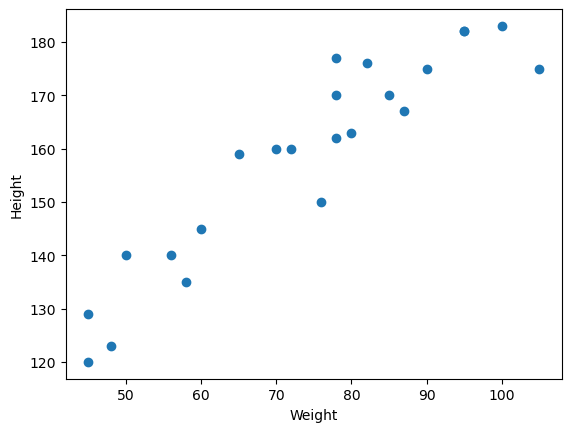

In [ ]:
pt.scatter(df['Weight'],df['Height'])
pt.xlabel("Weight")
pt.ylabel("Height")
pt.show()

In [7]:
##divide our dataset into independent and dependent features
X=df[['Weight']]
y=df['Height']

In [8]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [9]:
X_train

,Weight
12,105
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76


In [10]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [11]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [ ]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

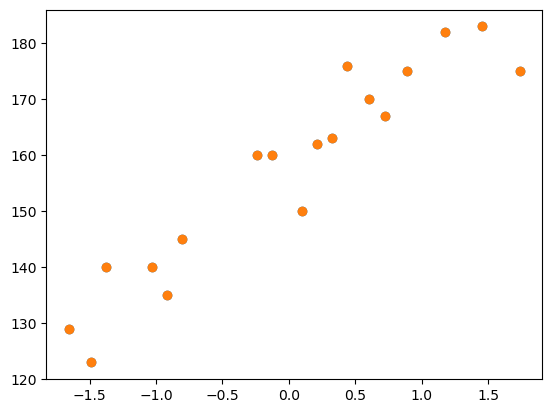

In [ ]:
pt.scatter(X_train,y_train)
pt.show()

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
reg = LinearRegression()

#,odel training on train data
reg.fit(X_train,y_train)
print("cofficient: ",reg.coef_)
print("intercept: ",reg.intercept_)

#model testing on test data
y_pred  = reg.predict(X_test)

#checking performance matrix
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
ad_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("the mean absoluter error is: ",mae)
print("the mean squared error is: ",mse)
print("the root mean square error is: ",rmse)
print("the mean r2_score is: ",score)
print("the adjusted r2_score error is: ",ad_score)


cofficient:  [17.03440872]
intercept:  157.5
the mean absoluter error is:  9.822657814519227
the mean squared error is:  109.77592599051654
the root mean square error is:  10.477400726827076
the mean r2_score is:  0.7769869860423441
the adjusted r2_score error is:  0.7026493147231254


### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =65.4364 + 1.26(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =65.4364 + 1.26(X_test)

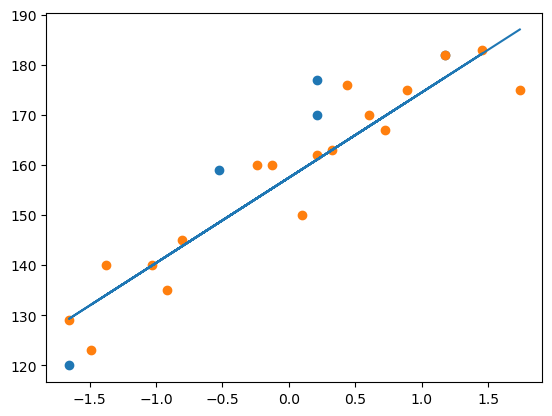

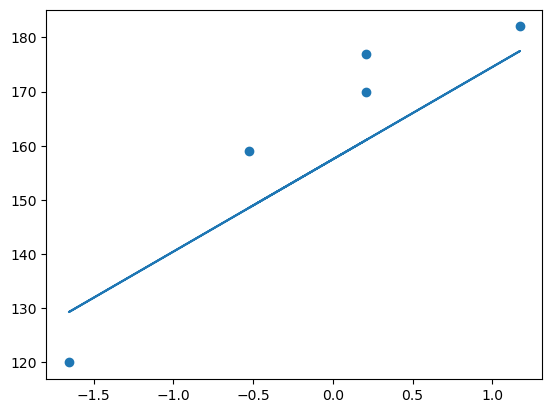

In [ ]:
# plotting training data and model prediction on the basis of trining data
pt.scatter(X_train,y_train)
pt.plot(X_train,reg.predict(X_train))
pt.show()

# plotting training data and model prediction on the basis of testing data
pt.scatter(X_test,y_test)
pt.plot(X_test,reg.predict(X_test))
pt.show()

## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [22]:
#prediction of completly new data

reg.predict(scaler.transform([[75]]))


d:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.19553315])

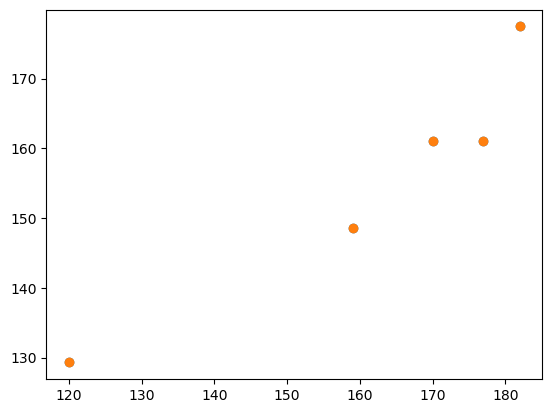

In [ ]:
## Assumptions

## plot a scatter plot for the prediction
pt.scatter(y_test,y_pred)
pt.show()

#if we get a linear graph between y_test and Y_pred then model is good

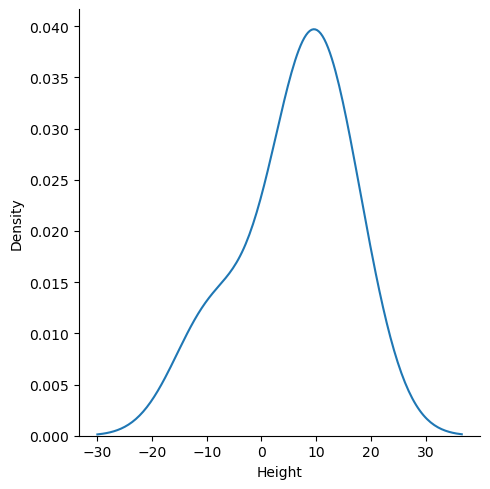

In [ ]:
## Residuals --> if we get a normal distrbution curve of residuals then model is good
import seaborn as sns
residuals=y_test-y_pred
residuals
sns.displot(residuals,kind='kde')
pt.show()

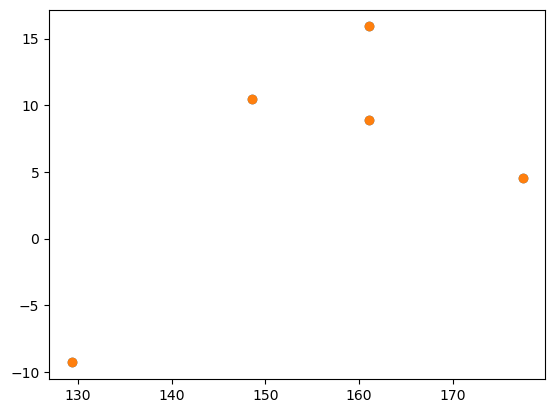

In [ ]:
## Scatter plot with respect to prediction and residuals
## uniform distribution between y_pred and residuals
pt.scatter(y_pred,residuals)
pt.show()

## Using OLS

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
prediction = model.predict(X_test)

In [33]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Mon, 09 Jun 2025   Prob (F-statistic):                       0.661
Time:                        16:48:07   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\Anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [34]:
reg.coef_

array([17.03440872])